In [1]:
import numpy as np
import scipy.interpolate as interpolate

In [2]:
env = ['duck_lift', 'banana_pass1', 'hammer_strike'][-1]
# data = np.load(f'{env}.npz', allow_pickle=True,)
# entries = data.files
# print(entries)
def load_motion(motion_file):
    motion_file = np.load(motion_file, allow_pickle=True)
    reference_motion =  {k:v for k, v in motion_file.items()}
    reference_motion['s_0'] = reference_motion['s_0'][()]
    return reference_motion
data = load_motion(f'{env}.npz')
data.keys()

dict_keys(['length', 'SIM_SUBSTEPS', 'DATA_SUBSTEPS', 'object_translation', 'object_orientation', 's_0'])

In [3]:
def data_analysis(data):
    print('range of data: ', np.min(data, axis=0), np.max(data, axis=0))
    print('start and end: ', data[0], data[-1])

In [4]:
print(data['object_translation'].shape)
trans_data = data['object_translation']
data_analysis(trans_data)

(59, 3)
range of data:  [-0.13407614 -0.20917316  0.04889371] [ 0.07301792 -0.11842044  0.22849914]
start and end:  [-0.12142183 -0.20917316  0.04889371] [-0.08168487 -0.15548259  0.18643826]


In [5]:
print(data['object_orientation'].shape)
ori_data = data['object_orientation']
data_analysis(ori_data)

(59, 4)
range of data:  [ 0.55069668  0.70205983 -0.30280827 -0.21246096] [ 0.70803234  0.81144097 -0.04634558  0.04666741]
start and end:  [ 0.70803234  0.70205983 -0.06042589  0.04637796] [ 0.61398888  0.7786923  -0.11786583 -0.05256997]


(80,) (80,)


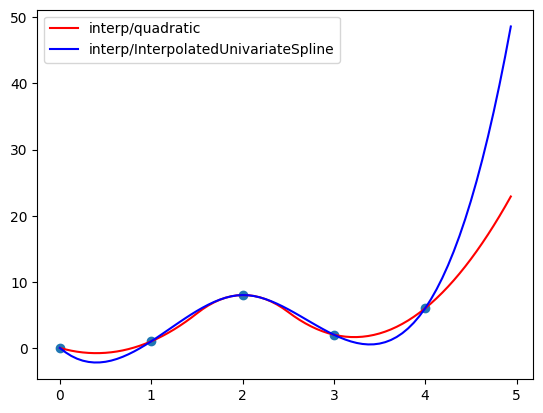

In [6]:
# example of interpolation
new_points = [0,1,8,2,6]
len_data = 80
f1 = interpolate.interp1d(np.arange(len(new_points)), new_points, kind='quadratic', fill_value="extrapolate")  # ‘linear’, ‘nearest’, ‘nearest-up’, ‘zero’, ‘slinear’, ‘quadratic’, ‘cubic’, ‘previous’, or ‘next’. 
f2 = interpolate.InterpolatedUnivariateSpline(np.arange(len(new_points)), new_points)

x_new = np.arange(0, len(new_points), len(new_points)/len_data)


import matplotlib.pyplot as plt
plt.scatter(np.arange(len(new_points)), new_points)
print(f1(x_new).shape, f2(x_new).shape)
plt.plot(x_new,f1(x_new),'r', label='interp/quadratic')
plt.plot(x_new,f2(x_new),'b', label='interp/InterpolatedUnivariateSpline')

plt.legend()
plt.show()

(80,) (80,)


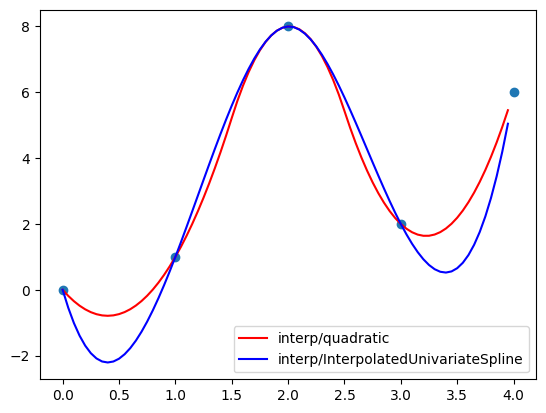

In [7]:
# example of interpolation
new_points = [0,1,8,2,6]
len_data = 80
f1 = interpolate.interp1d(np.arange(len(new_points)), new_points, kind='quadratic', fill_value="extrapolate")  # ‘linear’, ‘nearest’, ‘nearest-up’, ‘zero’, ‘slinear’, ‘quadratic’, ‘cubic’, ‘previous’, or ‘next’. 
f2 = interpolate.InterpolatedUnivariateSpline(np.arange(len(new_points)), new_points)

x_new = np.arange(0, len(new_points)-1, (len(new_points)-1)/len_data)


import matplotlib.pyplot as plt
plt.scatter(np.arange(len(new_points)), new_points)
print(f1(x_new).shape, f2(x_new).shape)
plt.plot(x_new,f1(x_new),'r', label='interp/quadratic')
plt.plot(x_new,f2(x_new),'b', label='interp/InterpolatedUnivariateSpline')

plt.legend()
plt.show()

(80,) (80,)


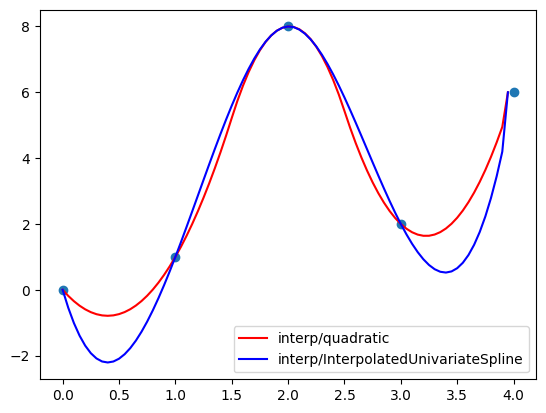

In [8]:
# example of interpolation
new_points = [0,1,8,2,6]
len_data = 80
f1 = interpolate.interp1d(np.arange(len(new_points)), new_points, kind='quadratic', fill_value="extrapolate")  # ‘linear’, ‘nearest’, ‘nearest-up’, ‘zero’, ‘slinear’, ‘quadratic’, ‘cubic’, ‘previous’, or ‘next’. 
f2 = interpolate.InterpolatedUnivariateSpline(np.arange(len(new_points)), new_points)

x_new = np.arange(0, len(new_points)-1, (len(new_points)-1)/len_data)


import matplotlib.pyplot as plt
plt.scatter(np.arange(len(new_points)), new_points)
y_new1 = f1(x_new)
y_new1[-1] = new_points[-1]
y_new2 = f2(x_new)
y_new2[-1] = new_points[-1]
print(y_new1.shape, y_new2.shape)
plt.plot(x_new,y_new1,'r', label='interp/quadratic')
plt.plot(x_new,y_new2,'b', label='interp/InterpolatedUnivariateSpline')

plt.legend()
plt.show()

In [9]:
def interpolate_data(data, initial_point=None, random_sample=5):
    points = np.random.uniform(np.min(data), np.max(data), size=random_sample)
    if initial_point is not None: # set the same initial point as original traj
        points[0] = initial_point
    else:
        points[0] = data[0]
    len_points = points.shape[0]
    f = interpolate.interp1d(np.arange(len_points), points, kind='quadratic', fill_value="extrapolate")  # ‘linear’, ‘nearest’, ‘nearest-up’, ‘zero’, ‘slinear’, ‘quadratic’, ‘cubic’, ‘previous’, or ‘next’. 

    x_new = np.arange(0, len_points-1, (len_points-1)/data.shape[0])
    y_new = f(x_new)
    y_new[-1] = points[-1]
    return y_new

In [10]:
new_trans_data = []
for d in trans_data.T:
    new_trans_data.append(interpolate_data(d))
new_trans_data = np.array(new_trans_data).T
print(new_trans_data.shape)

new_ori_data = []
for d in ori_data.T:
    new_ori_data.append(interpolate_data(d))
new_ori_data = np.array(new_ori_data).T
print(new_ori_data.shape)

(59, 3)
(59, 4)


In [11]:
import copy
save_dir = f'generated_trajs/{env}'
os.makedirs(save_dir, exist_ok=True)
new_traj = copy.copy(dict(data))

new_traj['object_translation'] = new_trans_data
new_traj['object_orientation'] = new_ori_data
print(new_traj.keys())
np.savez(save_dir+f'/{env}', **new_traj)  # save a dict as npz

dict_keys(['length', 'SIM_SUBSTEPS', 'DATA_SUBSTEPS', 'object_translation', 'object_orientation', 's_0'])


In [12]:
# loop over all envs
import sys
import copy
sys.path.append("..")
from tcdm.common import ENVS

for env in ENVS:
    # try:
    data = load_motion(f'{env}.npz')
    trans_data = data['object_translation']
    ori_data = data['object_orientation']

    new_trans_data = []
    for i, d in enumerate(trans_data.T):
        if data['s_0']['motion_planned']['position'].shape[0] == 36: # 30 hand + 3 pos + 3 ori of object
            initial_point = data['s_0']['motion_planned']['position'][30+i] # set the original position as initial sampled point position
        else:
            initial_point = None
        new_trans_data.append(interpolate_data(d, initial_point))
    new_trans_data = np.array(new_trans_data).T

    new_ori_data = []
    for d in ori_data.T:
        new_ori_data.append(interpolate_data(d))
    new_ori_data = np.array(new_ori_data).T

    print(f'{env}: {new_trans_data.shape}, {new_ori_data.shape}')

    save_dir = f'generated_trajs/{env}'
    os.makedirs(save_dir, exist_ok=True)
    new_traj = copy.copy(dict(data))

    new_traj['object_translation'] = new_trans_data
    new_traj['object_orientation'] = new_ori_data
    print('substeps: ', new_traj['SIM_SUBSTEPS'])
    np.savez(save_dir+f'/{env}', **new_traj)  # save a dict as npz
    # except:
    #     print(f'{env} is not working, shape: {trans_data.shape}')


dhand_elephant: (81, 3), (81, 4)
substeps:  10
wineglass_drink1: (90, 3), (90, 4)
substeps:  10
mouse_use1: (93, 3), (93, 4)
substeps:  10
alarmclock_lift: (40, 3), (40, 4)
substeps:  10
spheremedium_lift: (39, 3), (39, 4)
substeps:  10
banana_pass1: (85, 3), (85, 4)
substeps:  10
piggybank_use1: (81, 3), (81, 4)
substeps:  10
stamp_stamp1: (79, 3), (79, 4)
substeps:  10
hammer_strike: (59, 3), (59, 4)
substeps:  10
toothbrush_lift: (50, 3), (50, 4)
substeps:  10
mouse_lift: (50, 3), (50, 4)
substeps:  10
dhand_binoculars: (88, 3), (88, 4)
substeps:  10
lightbulb_pass1: (87, 3), (87, 4)
substeps:  10
hammer_use1: (86, 3), (86, 4)
substeps:  10
elephant_pass1: (81, 3), (81, 4)
substeps:  10
stanfordbunny_inspect1: (84, 3), (84, 4)
substeps:  10
scissors_use1: (90, 3), (90, 4)
substeps:  10
watch_lift: (46, 3), (46, 4)
substeps:  10
waterbottle_lift: (42, 3), (42, 4)
substeps:  10
headphones_pass1: (86, 3), (86, 4)
substeps:  10
binoculars_pass1: (88, 3), (88, 4)
substeps:  10
dhand_alar